In [1]:
import numpy as np
import random
import gym_graph
import gym
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from keras.optimizers import Adam
import keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint
WINDOW_LENGTH = 12

/Users/scottsfarley/Library/Python/2.7/lib/python/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
env = gym.make("graph-v0")
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

[2018-05-20 15:59:10,044] Making new env: graph-v0


imported libraries
Navigation Environment - Version 0.1.0


([0.4, 0.00015719999999674883, 0.00015719999999674883, 4.440000000016653e-05, 4, 110.072, 25, -175.0, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 292.65099999999995, 25, 5.0, 51.851, 25, 78.30000000000001, 105.23499999999999, 25, -101.69999999999999], 0, False, {})


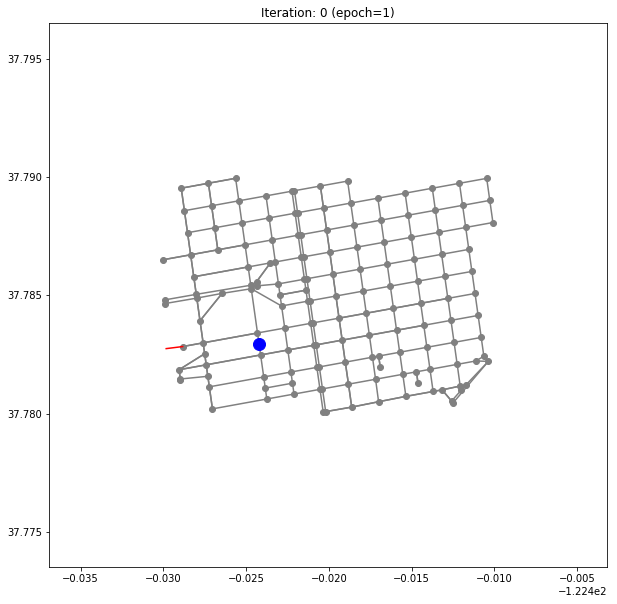

In [4]:
env.reset()
env.render()
x = env.step(1)
print x

In [5]:

class EnvProcessor(Processor):
    def process_observation(self, observation):
        print observation
        return observation

    def process_reward(self, reward):
        print reward
        return reward

In [6]:
INPUT_SHAPE = (29,)
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(1024))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions, activation="softmax"))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 348)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              357376    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 885,767
Trainable params: 885,767
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
processor = EnvProcessor()

In [8]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.05, value_test=.05,
                              nb_steps=1000000)

# The trade-off between exploration and exploitation is difficult and an on-going research topic.
# If you want, you can experiment with the parameters or use a different policy. Another popular one
# is Boltzmann-style exploration:
# policy = BoltzmannQPolicy(tau=1.)
# Feel free to give it a try!

dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory,
               nb_steps_warmup=50000, gamma=.99, target_model_update=10000,
               train_interval=4, delta_clip=1.)
dqn.compile(Adam(lr=.00025), metrics=['mae'])


In [ ]:

# Okay, now it's time to learn something! We capture the interrupt exception so that training
# can be prematurely aborted. Notice that you can the built-in Keras callbacks!
weights_filename = 'dqn_{}_weights.h5f'.format("graph-v0")
checkpoint_weights_filename = 'dqn_graph-v0_weights_{step}.h5f'
log_filename = 'dqn_{}_log.json'.format("graph-v0")
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
callbacks += [FileLogger(log_filename, interval=100)]
dqn.fit(env, callbacks=callbacks, nb_steps=200000, log_interval=10000)

# After training is done, we save the final weights one more time.
dqn.save_weights(weights_filename, overwrite=True)

# Finally, evaluate our algorithm for 10 episodes.
dqn.test(env, nb_episodes=10, visualize=True)

Training for 200000 steps ...
Interval 1 (0 steps performed)
  892/10000 [=>............................] - ETA: 33s - reward: -24.1312Got reward for reaching goal +1000!
reached goal!
 2186/10000 [=====>........................] - ETA: 29s - reward: -23.3303Got reward for reaching goal +1000!
reached goal!
 2198/10000 [=====>........................] - ETA: 29s - reward: -22.8048Got reward for reaching goal +1000!
reached goal!
 2647/10000 [======>.......................] - ETA: 28s - reward: -22.4027Got reward for reaching goal +1000!
reached goal!
 2650/10000 [======>.......................] - ETA: 28s - reward: -22.01 - ETA: 28s - reward: -22.0189Got reward for reaching goal +1000!
reached goal!
 3713/10000 [==========>...................] - ETA: 24s - reward: -21.5392Got reward for reaching goal +1000!
reached goal!
 4634/10000 [============>.................] - ETA: 21s - reward: -21.3692Got reward for reaching goal +1000!
reached goal!
 4656/10000 [============>.................

  435/10000 [>.............................] - ETA: 1:00 - reward: -23.7356- ETA: 1:00 - rewardGot reward for reaching goal +1000!
reached goal!
  440/10000 [>.............................] - ETA: 1:00 - reward: -21.3068Got reward for reaching goal +1000!
reached goal!
  446/10000 [>.............................] - ETA: 1:00 - reward: -19.0022Got reward for reaching goal +1000!
reached goal!
 1522/10000 [===>..........................] - ETA: 54s - reward: -18.0848Got reward for reaching goal +1000!
reached goal!
 1523/10000 [===>..........................] - ETA: 54s - reward: -17.4163Got reward for reaching goal +1000!
reached goal!
 1972/10000 [====>.........................] - ETA: 49s - reward: -18.2302Got reward for reaching goal +1000!
reached goal!
 3728/10000 [==========>...................] - ETA: 32s - reward: -20.1985Got reward for reaching goal +1000!
reached goal!
 6576/10000 [==================>...........] - ETA: 16s - reward: -21.9700Got reward for reaching goal +1000!

In [ ]:
plt.show()